<a href="https://colab.research.google.com/github/Divyanshu-ISM/Machine-Learning-Deep-Learning/blob/main/100ML_Day4(2)-%20LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#100ML - Day 2 : Part 2 - Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


So, this is a Dataset where we have to identify the user features and predict/classify weather he/she will make a purchase or not.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [14]:
# set(df['User ID'])
df['Male'] = pd.get_dummies(df['Gender'],drop_first=True)

In [15]:
X = df[['Male','Age','EstimatedSalary']].values
y = df['Purchased'].values

In [16]:
#

Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression()

In [30]:
classifier.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
yp = classifier.predict(scaled_X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_test,yp)

0.9

In [36]:
cm1 = confusion_matrix(y_test,yp)
cm1

array([[65,  3],
       [ 7, 25]])

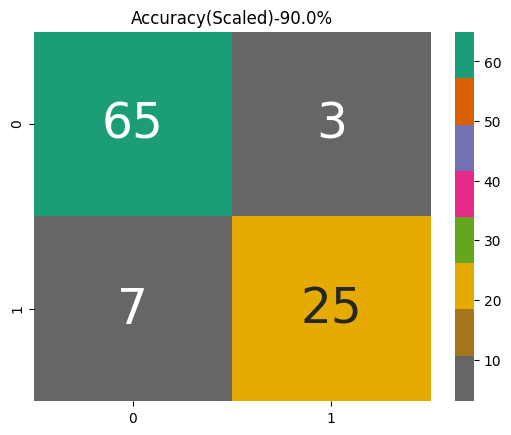

In [52]:
plt.style.use('default')
ac1 = accuracy_score(yp,y_test)
plt.title(f'Accuracy(Scaled)-{ac1*100}%')
sns.heatmap(cm1,cmap='Dark2_r',annot=True,annot_kws={'fontsize':35});

Just to illustrate the diffence Feature Scaling can make. Above results are when model was trained on Scaled Features. 

Next up, we'll train on non-scaled features and see the difference.

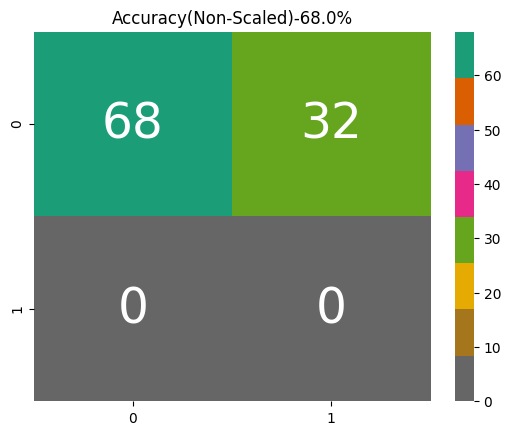

In [54]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
yp1 = lr.predict(X_test)

cm2 = confusion_matrix(yp1,y_test)
ac2 = accuracy_score(yp1,y_test)
plt.style.use('default')
plt.title(f'Accuracy(Non-Scaled)-{ac2*100}%')
sns.heatmap(cm2,cmap='Dark2_r',annot=True,annot_kws={'fontsize':35});

In [55]:
classifier.coef_

array([[0.09452625, 2.09587724, 1.11776434]])

In [56]:
yp_probs = classifier.predict_proba(scaled_X_test)